In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import cv2
from google.colab.patches import cv2_imshow 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**COVER IMAGE**

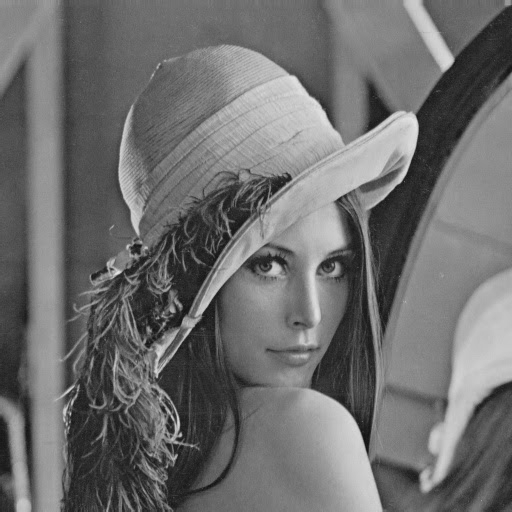

In [ ]:
cover = cv2.imread('/content/drive/My Drive/IP/lena.bmp',cv2.IMREAD_GRAYSCALE)

cv2_imshow(cover)

SECRET MESSAGE IMAGE

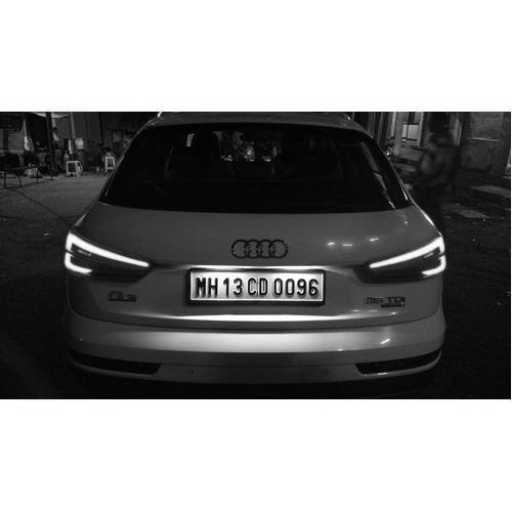

(512, 512)


In [ ]:
img_message = cv2.imread('/content/drive/My Drive/IP/carplate.bmp',cv2.IMREAD_GRAYSCALE)
message=cv2.resize(img_message,(cover.shape[0],cover.shape[1]))
cv2_imshow(message)
print(message.shape)

**EXTRACTING 8 BIT PLANES OF COVER IMAGE**

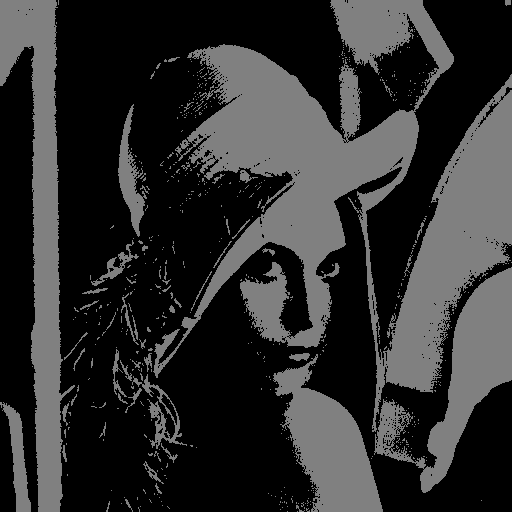

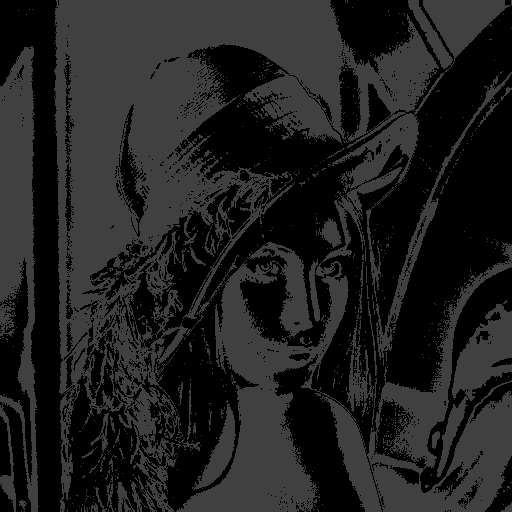

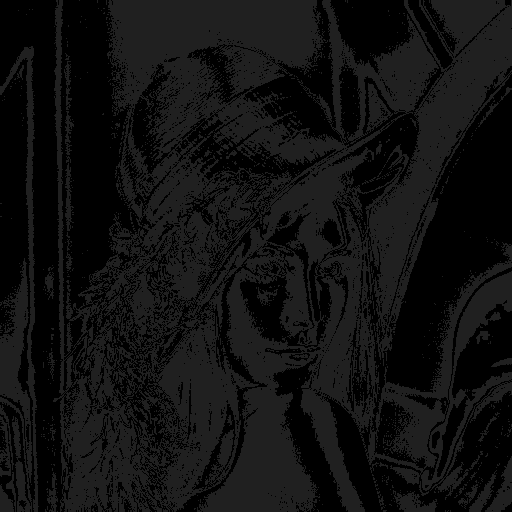

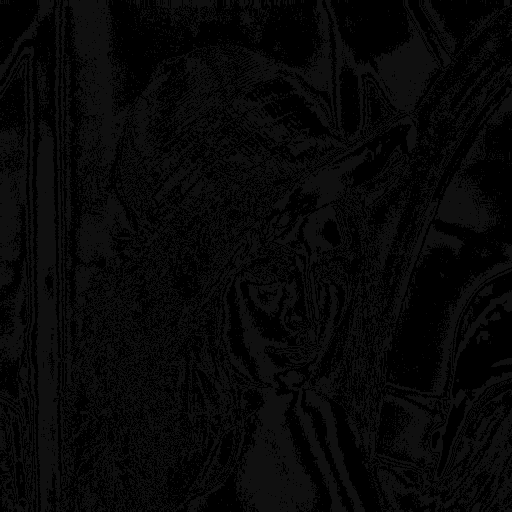

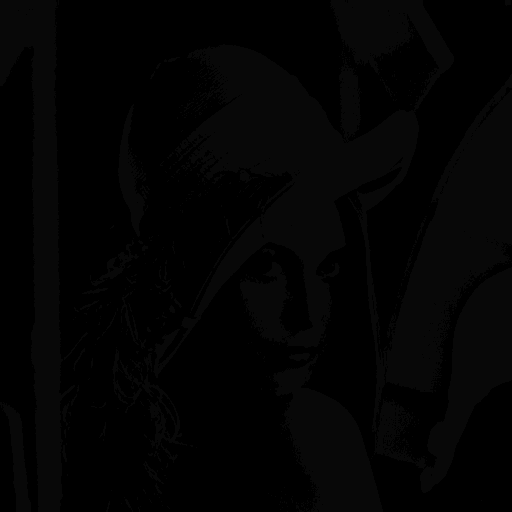

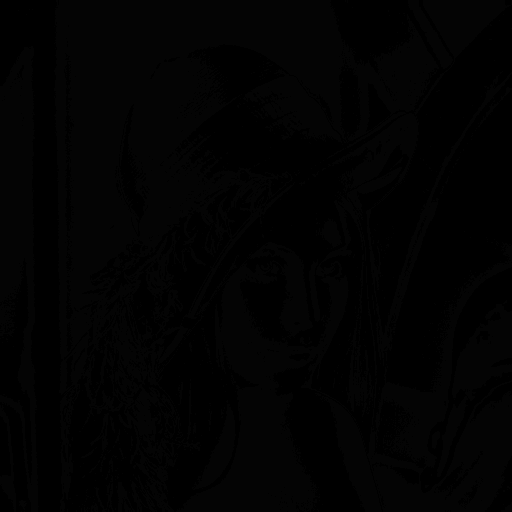

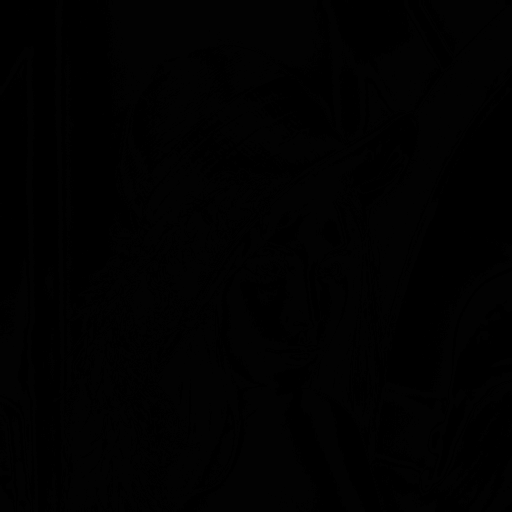

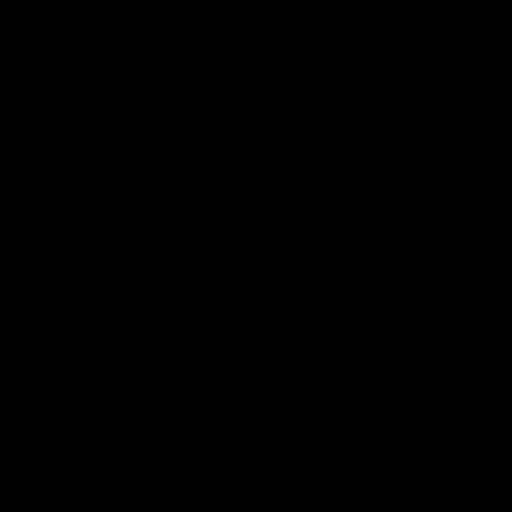

In [ ]:
 lst=[]
 for i in range(cover.shape[0]):
   for j in range(cover.shape[1]):
     lst.append(np.binary_repr(cover[i][j], width=8))  



eight_bit_cover = (np.array([int(i[0]) for i in  lst],dtype=np.uint8)*128).reshape(cover.shape[0],cover.shape[1])
cv2_imshow(eight_bit_cover)

seven_bit_cover = (np.array([int(i[1]) for i in  lst],dtype=np.uint8)*64).reshape(cover.shape[0],cover.shape[1])
cv2_imshow(seven_bit_cover)

six_bit_cover = (np.array([int(i[2]) for i in  lst],dtype=np.uint8)*32).reshape(cover.shape[0],cover.shape[1])
cv2_imshow(six_bit_cover)

five_bit_cover = (np.array([int(i[3]) for i in  lst],dtype=np.uint8)*16).reshape(cover.shape[0],cover.shape[1])
cv2_imshow(five_bit_cover)

four_bit_cover = (np.array([int(i[0]) for i in  lst],dtype=np.uint8)*8).reshape(cover.shape[0],cover.shape[1])
cv2_imshow(four_bit_cover)

three_bit_cover = (np.array([int(i[1]) for i in  lst],dtype=np.uint8)*4).reshape(cover.shape[0],cover.shape[1])
cv2_imshow(three_bit_cover)

two_bit_cover = (np.array([int(i[2]) for i in  lst],dtype=np.uint8)*2).reshape(cover.shape[0],cover.shape[1])
cv2_imshow(two_bit_cover)

one_bit_cover = (np.array([int(i[3]) for i in  lst],dtype=np.uint8)*1).reshape(cover.shape[0],cover.shape[1])
cv2_imshow(one_bit_cover)



**EXTRACTING 4  MSB PLANES OF MESSAGE IMAGE**

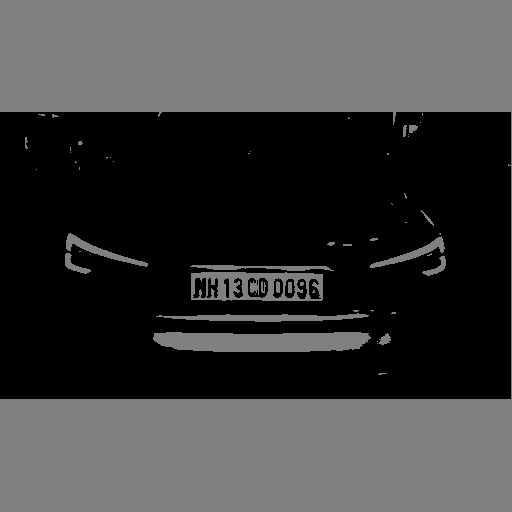

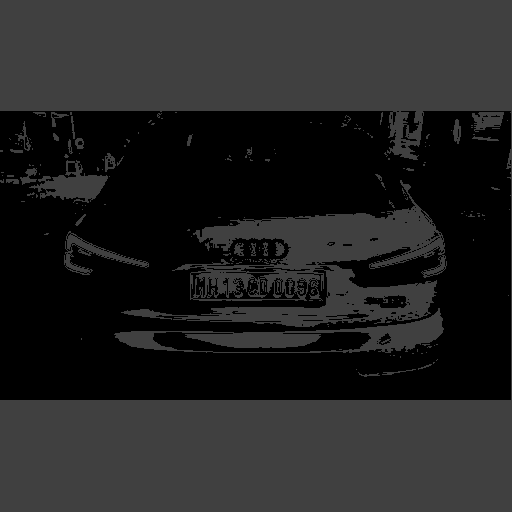

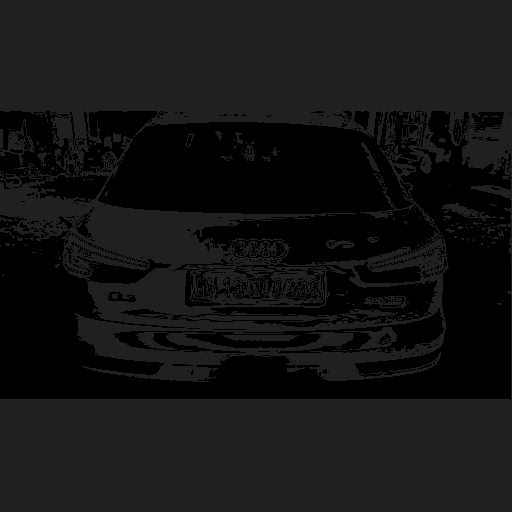

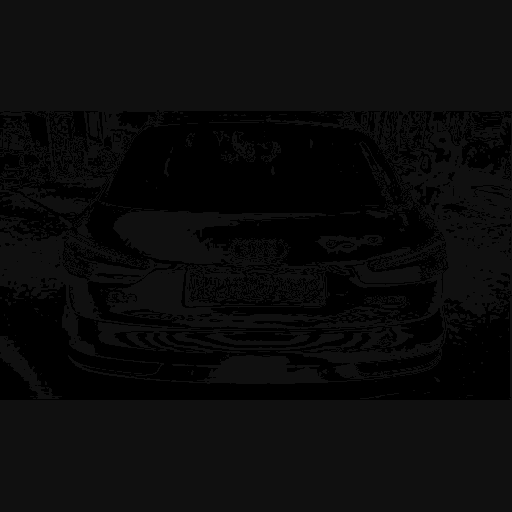

In [ ]:
 lst=[]
 for i in range(message.shape[0]):
   for j in range(message.shape[1]):
     lst.append(np.binary_repr(message[i][j], width=8))  



eight_bit_msg = (np.array([int(i[0]) for i in  lst],dtype=np.uint8)*128).reshape(message.shape[0],message.shape[1])
cv2_imshow(eight_bit_msg)

seven_bit_msg = (np.array([int(i[1]) for i in  lst],dtype=np.uint8)*64).reshape(message.shape[0],message.shape[1])
cv2_imshow(seven_bit_msg)

six_bit_msg = (np.array([int(i[2]) for i in  lst],dtype=np.uint8)*32).reshape(message.shape[0],message.shape[1])
cv2_imshow(six_bit_msg)

five_bit_msg = (np.array([int(i[3]) for i in  lst],dtype=np.uint8)*16).reshape(message.shape[0],message.shape[1])
cv2_imshow(five_bit_msg)




**EMBEDDING SECRET IMAGE INTO COVER IMAGE**

In [ ]:
stego_img=np.zeros((cover.shape[0],cover.shape[1]))

In [ ]:
stego=eight_bit_cover+seven_bit_cover+six_bit_cover+five_bit_cover + four_bit_cover + three_bit_cover+ two_bit_cover + six_bit_msg

**STEGANOGRAPHIC IMAGE**

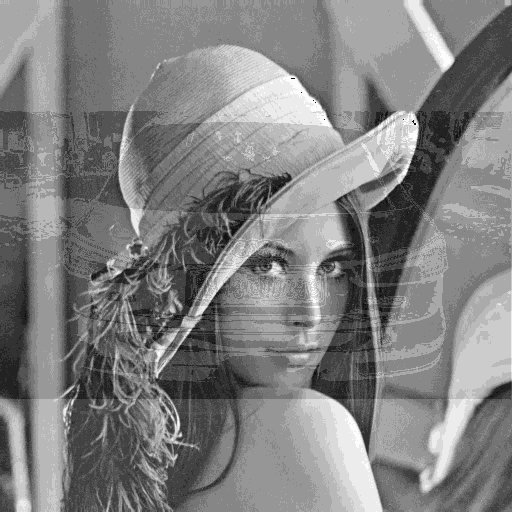

In [ ]:
cv2_imshow(stego)

**EXTRACTION OF MESSAGE IMAGE**

In [ ]:
 lst=[]
 for i in range(stego.shape[0]):
   for j in range(stego.shape[1]):
     lst.append(np.binary_repr(stego[i][j], width=8))  

eight_bit= (np.array([int(i[0]) for i in  lst],dtype=np.uint8)*128).reshape(stego.shape[0],stego.shape[1])

seven_bit= (np.array([int(i[1]) for i in  lst],dtype=np.uint8)*64).reshape(stego.shape[0],stego.shape[1])

six_bit= (np.array([int(i[2]) for i in  lst],dtype=np.uint8)*32).reshape(stego.shape[0],stego.shape[1])

five_bit = (np.array([int(i[3]) for i in  lst],dtype=np.uint8)*16).reshape(stego.shape[0],stego.shape[1])

four_bit = (np.array([int(i[4]) for i in  lst],dtype=np.uint8)*8).reshape(stego.shape[0],stego.shape[1])

three_bit= (np.array([int(i[5]) for i in  lst],dtype=np.uint8)*4).reshape(stego.shape[0],stego.shape[1])

two_bit= (np.array([int(i[6]) for i in  lst],dtype=np.uint8)*2).reshape(stego.shape[0],stego.shape[1])

one_bit= (np.array([int(i[7]) for i in  lst],dtype=np.uint8)*1).reshape(stego.shape[0],stego.shape[1])



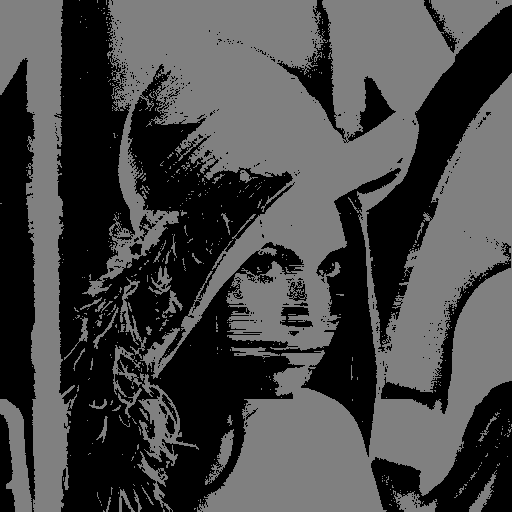

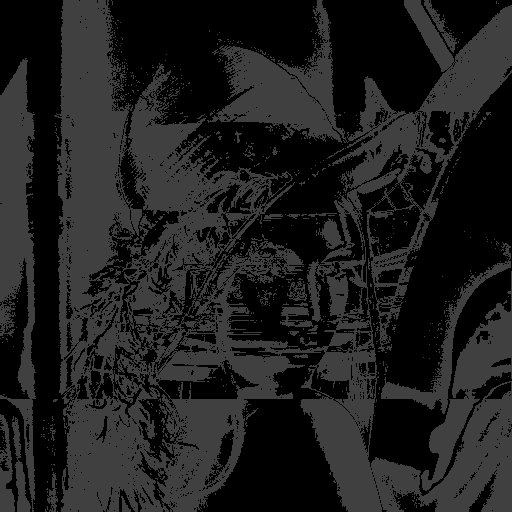

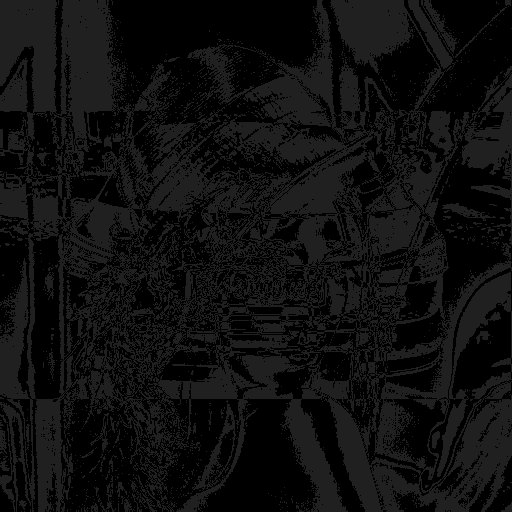

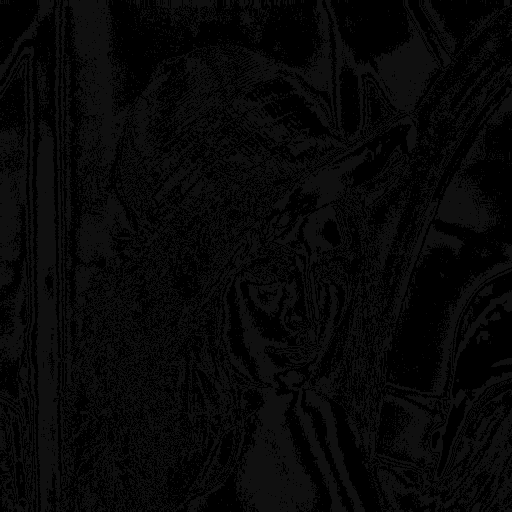

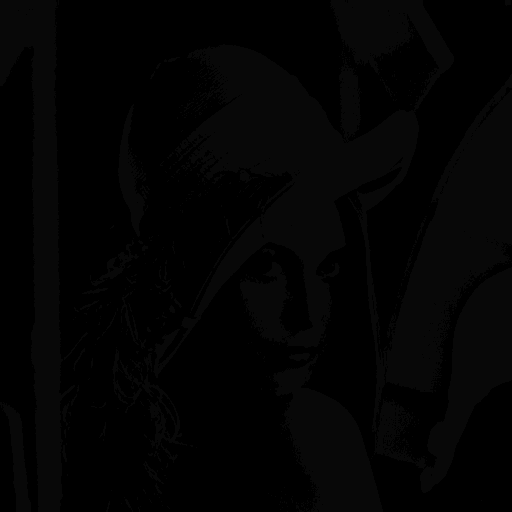

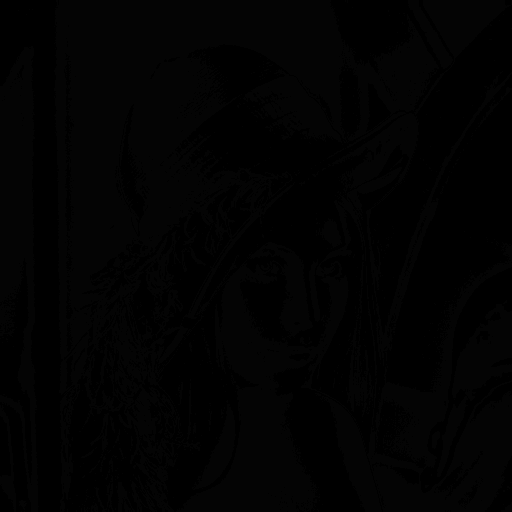

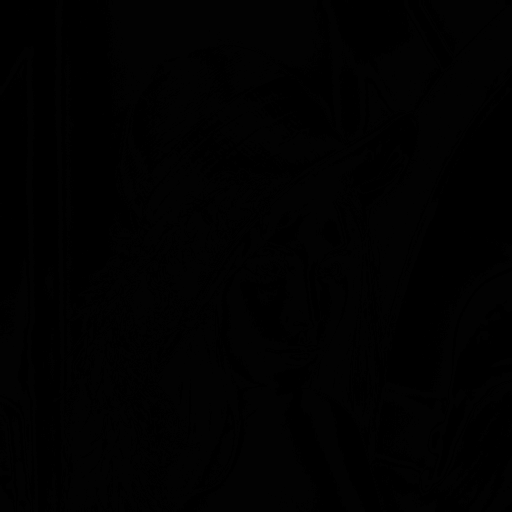

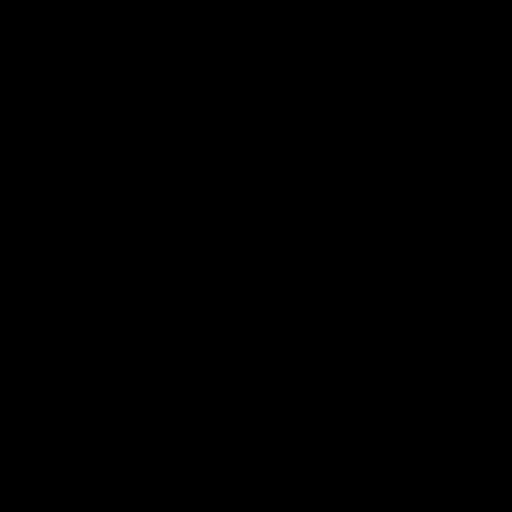

In [ ]:
cv2_imshow(eight_bit)
cv2_imshow(seven_bit)
cv2_imshow(six_bit)
cv2_imshow(five_bit)
cv2_imshow(four_bit)
cv2_imshow(three_bit)
cv2_imshow(two_bit)
cv2_imshow(one_bit)



In [ ]:
#seventh bit plane shows some exposure to msg image
secret=cv2.normalize(six_bit,None,0,255,norm_type=cv2.NORM_MINMAX)

**EXTRACTED MESSAGE IMAGE**

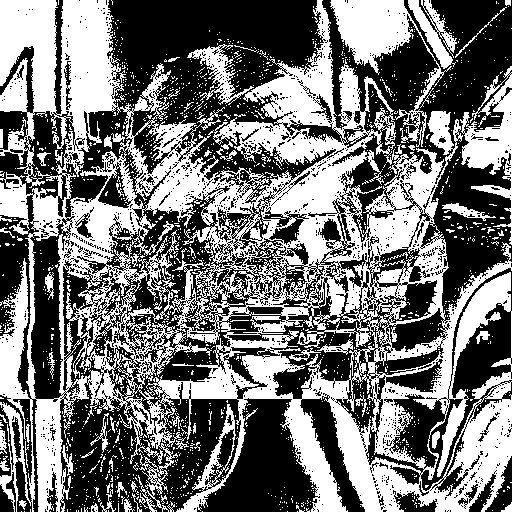

In [ ]:
cv2_imshow(secret)